Titanic kaggle problem using deep learning


In [881]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
import seaborn as sns

In [894]:

raw_data=pd.read_csv("/Users/elena/Downloads/titanic.csv")
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [896]:
test_data_csv=pd.read_csv("/Users/elena/Downloads/test.csv")
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


Data visulaisation

In [897]:
raw_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [898]:
raw_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [899]:
coor_matrix=raw_data.corr()
coor_matrix["Survived"].sort_values(ascending=False)

Survived       1.000000
Fare           0.257307
Parch          0.081629
PassengerId   -0.005007
SibSp         -0.035322
Age           -0.077221
Pclass        -0.338481
Name: Survived, dtype: float64

<function matplotlib.pyplot.show(*args, **kw)>

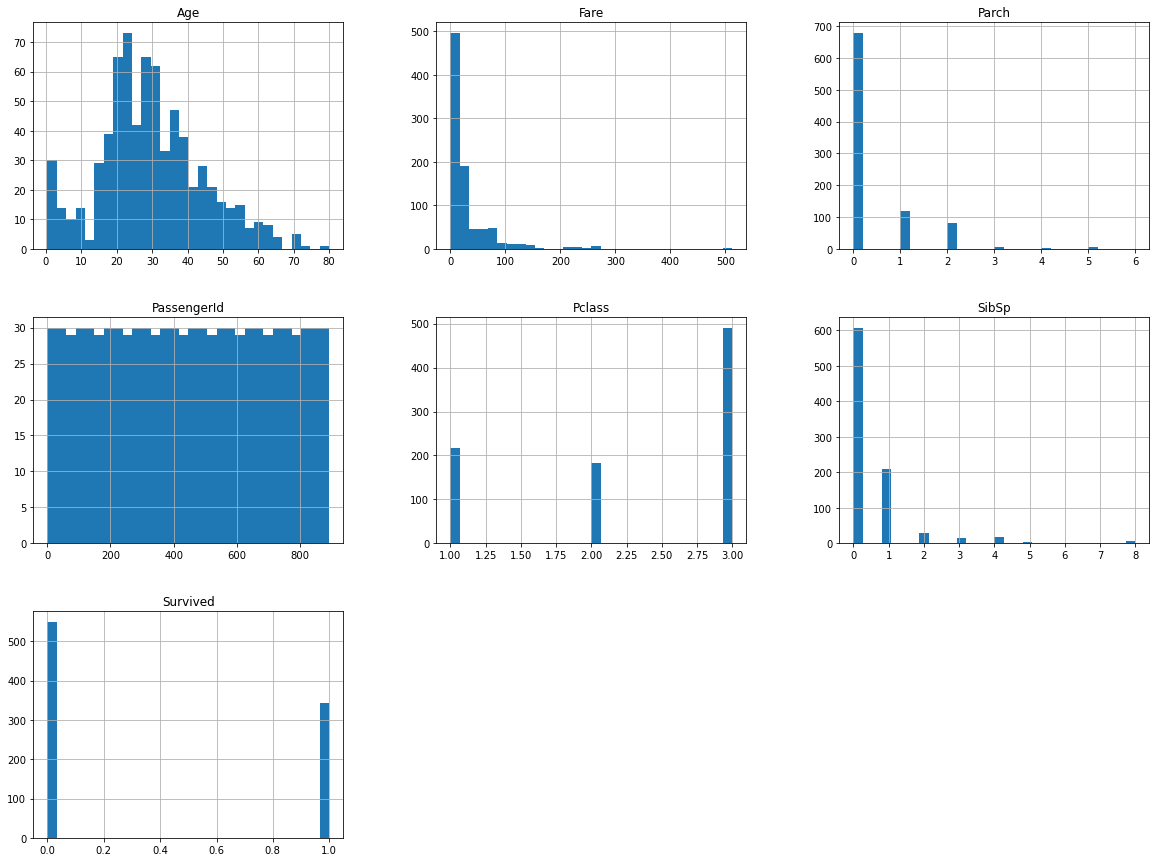

In [900]:
raw_data.hist(bins=30,figsize=(20,15))
plt.show


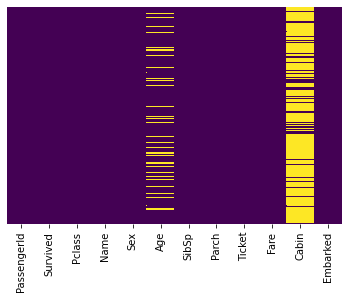

In [901]:
sns.heatmap(raw_data.isnull(), cbar = False , 
            yticklabels = False , cmap = 'viridis')


In [892]:
raw_data["Embarked"]=raw_data["Embarked"].fillna("S")
raw_data.info()
test_data_csv["Embarked"]=test_data["Embarked"].fillna("S")
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 76.7+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex  

In [893]:
raw_data=raw_data.drop("PassengerId",axis=1)
test_data_csv=raw_data.drop("PassengerId",axis=1)

raw_data=raw_data.drop("Cabin",axis=1)
test_data_csv=raw_data.drop("Cabin",axis=1)

raw_data=raw_data.drop("Ticket",axis=1)
test_data_csv=raw_data.drop("Ticket",axis=1)

KeyError: "['PassengerId'] not found in axis"

In [869]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 76.7+ KB


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa2dd1a3730>,
      dtype=object)

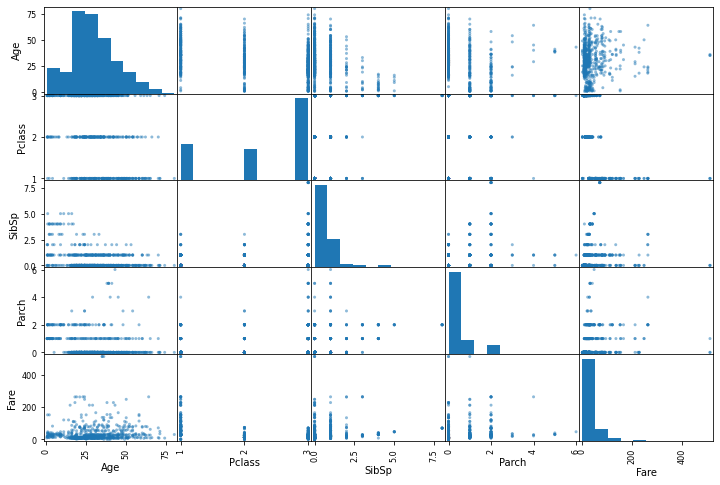

In [844]:
#to fill missing age looking for way to predict age

from pandas.plotting import scatter_matrix

attributes=["Age","Pclass","Sex",
           "SibSp","Parch","Fare"]
scatter_matrix(raw_data[attributes],figsize=(12,8))

/Users/elena/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


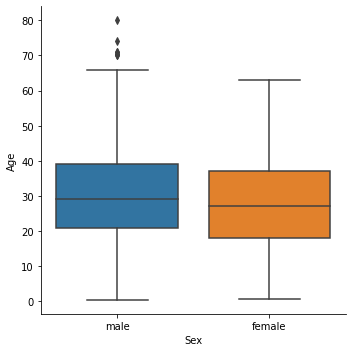

In [845]:
age_plot=sns.factorplot(y='Age',x='Sex',data=raw_data,kind="box")

/Users/elena/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


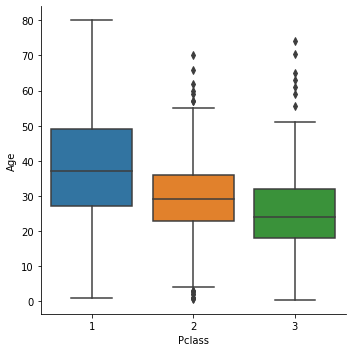

In [846]:
age_plot=sns.factorplot(y='Age',x='Pclass',data=raw_data,kind="box")

In [847]:
#so depending on the class  first class takes age of 
def AgeImpute(data):
    Age = data[0]
    Pclass = data[1]
    
    if pd.isnull(Age):
        if Pclass == 1: return 37
        elif Pclass == 2: return 29
        else: return 24
    else:
        return Age

# Age Impute
raw_data['Age'] = raw_data[['Age' , 'Pclass']].apply(AgeImpute, axis = 1)

In [848]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       891 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 76.7+ KB


In [849]:
raw_data['Name'].head()

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
Name: Name, dtype: object

In [850]:
#ectract data from name
title=[]
for name in raw_data["Name"]:
    f=name.split(',')[1]
    s=f.split(".")[0].strip()
    title.append(s)
title=pd.Series(title)

In [851]:
raw_data['title']=title

In [852]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       891 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  891 non-null    object 
 11  title     891 non-null    object 
dtypes: float64(2), int64(4), object(6)
memory usage: 83.7+ KB


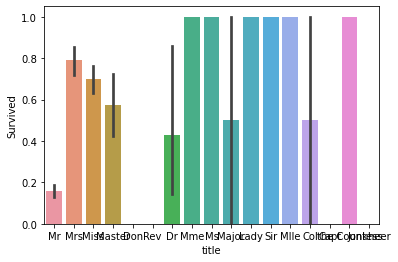

In [853]:
sns.barplot(x=raw_data['title'], y = raw_data['Survived'])

In [854]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       891 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  891 non-null    object 
 11  title     891 non-null    object 
dtypes: float64(2), int64(4), object(6)
memory usage: 83.7+ KB


In [855]:
def drop_columns(data,*args):
    for arg in args:
        data=data.drop(arg,axis=1)
    return data

In [856]:

def pipe_line(data):
    labels=raw_data["Survived"].copy()
    
    data=one_hot(data,"Sex","Embarked",'Pclass','SibSp','Parch')
    data=drop_columns(data,"PassengerId","Name","Survived",'Ticket')
    return data

In [857]:
labels=raw_data["Survived"].copy()



data_title = pd.get_dummies(raw_data["title"], drop_first=False)
raw_data.info()
data_sex = pd.get_dummies(raw_data["Sex"], drop_first=False)


data_embark= pd.get_dummies(raw_data["Embarked"], drop_first=False)



data_p = pd.get_dummies(raw_data["Pclass"], drop_first=False)


data_s = pd.get_dummies(raw_data["SibSp"], drop_first=False)

data_par = pd.get_dummies(raw_data["Parch"], drop_first=False)


raw_data=drop_columns(raw_data,"Pclass",'SibSp','Parch',"Cabin","Embarked",
                      'Sex','title',"Survived","Name","Ticket","PassengerId")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       891 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  891 non-null    object 
 11  title     891 non-null    object 
dtypes: float64(2), int64(4), object(6)
memory usage: 83.7+ KB


KeyError: "['PassengerId'] not found in axis"

In [ ]:
raw_data.info()

In [ ]:
raw_data = pd.concat([raw_data, data_title], axis=1)
raw_data = pd.concat([raw_data,data_sex ], axis=1)
raw_data = pd.concat([raw_data, data_embark], axis=1)
raw_data = pd.concat([raw_data, data_p], axis=1)
raw_data = pd.concat([raw_data, data_par], axis=1)
raw_data = pd.concat([raw_data, data_s], axis=1)

In [ ]:
raw_data.head()

In [ ]:
raw_data.info()

In [ ]:
dataset = tf.data.Dataset.from_tensor_slices((raw_data.values, labels.values))

In [ ]:
for feat, targ in dataset.take(3):
  print ('Features: {}, Target: {}'.format(feat, targ))

In [ ]:
clean_data=np.asarray(raw_data)
clean_label=np.asarray(labels)


In [ ]:
train_data=clean_data[:712]
train_label=clean_label[:712]

test_data=clean_data[712:]
test_label=clean_label[712:]


In [ ]:
mean=train_data.mean(axis=0)
std = train_data.std(axis=0)

train_data -= mean
train_data /=std

test_data -=mean
test_data/= std 

train_data.shape

In [ ]:
train_val=train_data[:605]
target_val=train_label[:605]

partial_train_val=train_data[605:]
partial_target_val=train_label[605:]


In [ ]:
from keras import models, layers,regularizers,optimizers,LeakyReLU

#using sequential layers that stack on one another
#input shape is shape of inputs, with rely activation neuron used excpet last layer that is sigmoid to measure true or false
#loss metrick use is crossentropy sice its just two cases measures
#and metric of measurement is accuracy ,optimizer used is rmsprop any other optimizer is fine
# such as adam or SGD which is the comonly used one
def build_model(n1,n2):
    model=models.Sequential()
    model.add(layers.Dense(n1,
                           input_shape=(train_data.shape[1],)))
    model.add(layers.Dropout(0.2))
    model.add(LeakyReLU())
   
    model.add(layers.Dense(n2))
    model.add(layers.Dropout(0.1))
    model.add(LeakyReLU())
    
    model.add(layers.Dense(1,activation='sigmoid'))
    model.compile(
        optimizer="Adam",
        loss='binary_crossentropy',
        metrics=['accuracy'])
    return model


In [ ]:
#final training to see if network would generalise on data not seen before,this is important
model2=build_model(50,50)
epochs_=50

model2.fit(train_data,train_label,epochs=epochs_, batch_size=64)

In [ ]:
results = model2.evaluate(test_data,test_label)
print(results)